In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [15]:
def readfile_func(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 0]
    Y = data.iloc[:, 1]
    plt.scatter(X, Y)
    plt.show()
    return X, Y


In [16]:
def calculate_cost_func(X_train,Y_train,c,m):
    cost = 0.0
    for i in range(X_train.shape[0]):
        cost += (c + m*X_train[i] - Y_train[i])**2 
    return cost

In [17]:
def log_gradient_func(X_train,Y_train,c,m):
    d_m = 0
    d_c = 0
    size = X_train.shape[0]
    for i in range(size):
        d_c = d_c + (c + m*X_train[i] - Y_train[i])  #w.rt to c
        d_m = d_m + ((c + m*X_train[i] - Y_train[i])*X_train[i])  #wrt to m
    
    d_c = d_c*(1.0/size)
    d_m = d_m*(1.0/size)
    return d_c, d_m
        

In [18]:
def gradient_descent_func(X_train,Y_train,alpha =.00001, ep =.0001,max_iter=1000000):
    
    
    iteration = 0
    converged = True

    m =  np.random.randn(); 
    c = np.random.randn();
    cost = calculate_cost_func(X_train,Y_train,c,m)
    
    while converged:
        
        d_c, d_m = log_gradient_func(X_train,Y_train,c,m)
        temp0 = c - alpha * d_c    # finding new c and m from using gradient descent
        temp1 = m - alpha * d_m
        c = temp0  # updating c and m
        m = temp1
        e = calculate_cost_func(X_train,Y_train,c,m) # mean squared error to check if c and m are good fit 
        if abs(cost-e) <= ep:   # taking abs value to ignore the negative value
            print('Converged, iterations: ', iteration, '!!!')
            converged = False     
        cost = e  
        iteration = iteration + 1  
    return c,m

In [19]:
def predict_func(X,c,m):
    Y_pred = m*X + c
    #print(Y_pred)
    return Y_pred

In [20]:
def buildModel_func(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    c,m = gradient_descent_func(X,Y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
    # dividing my train and test size
    print(type(X),type(Y),type(X_train))
    plt.scatter(X_train,Y_train,color='red')
    plt.plot(X_train,predict_func(X_train,c,m))
    plt.title('Salary VS Experience (Training set)')
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    
    plt.scatter(X_test,Y_test,color='red')
    plt.plot(X_train,predict_func(X_train,c,m))
    plt.title('Salary VS Experience (Testing set)')
    
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    
    
    

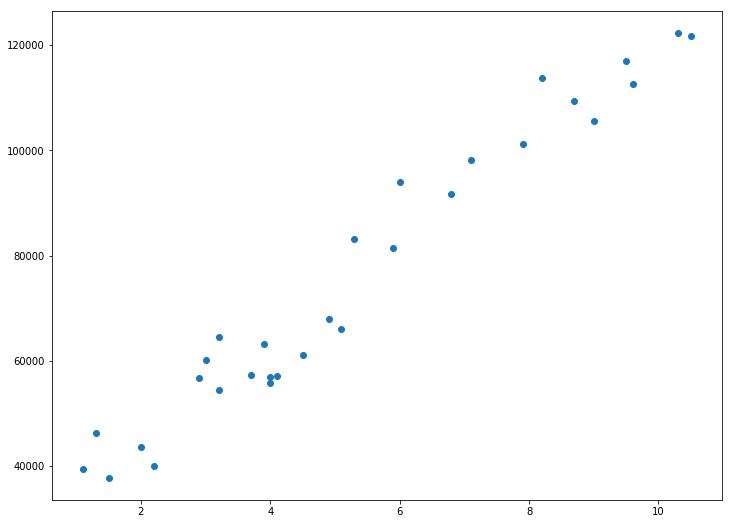

Converged, iterations:  4457178 !!!
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


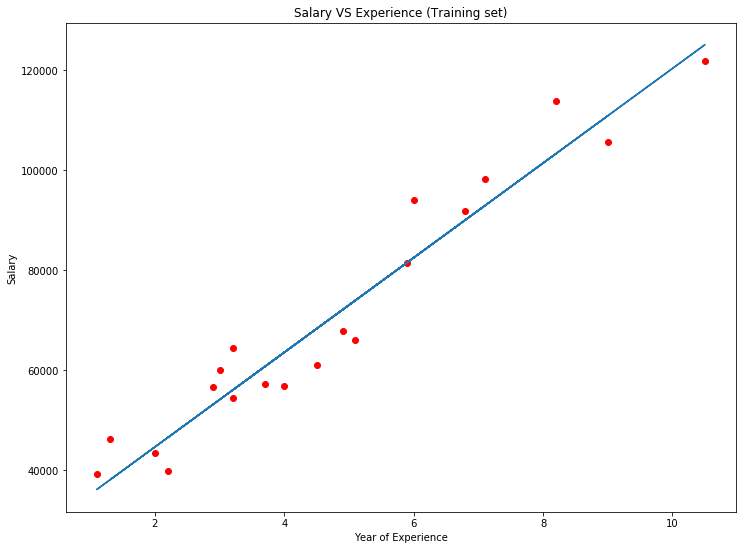

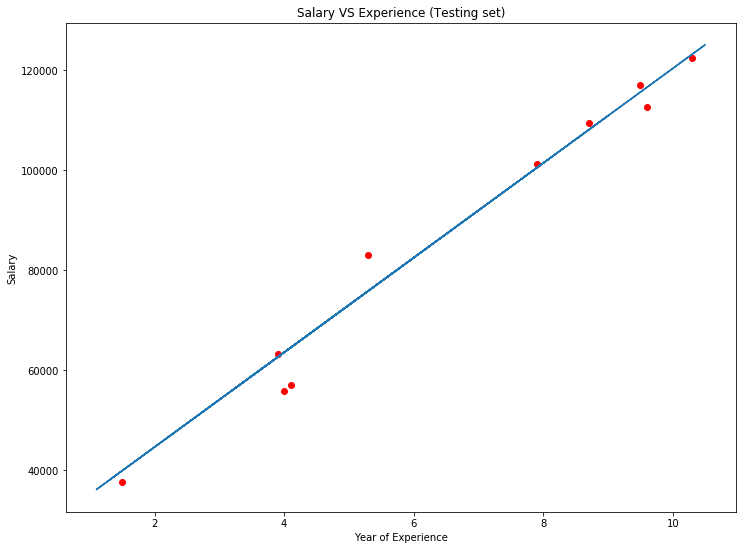

TypeError: cannot unpack non-iterable NoneType object

In [21]:
if __name__ == "__main__":

    X, Y = readfile_func('salary_data.csv') #loading the dataset  
    c,m = buildModel_func(X,Y)
    x = input("Enter the number!")
    x = int(x)
    print(x*m+c)
    
    